<a href="https://colab.research.google.com/github/LuisSilvaS/Machine_Learning/blob/main/An%C3%A1lise_de_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Análise de Sentimentos usando Machine Learning**

* Criando modelos para análise de sentimentos de tweets

In [6]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Datasets - DS/Tweets_Mg.csv', encoding='utf-8')

In [8]:
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conta a quantidade de linhas de tweets neutros, positivos e negativos**

In [9]:
df.Classificacao.value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

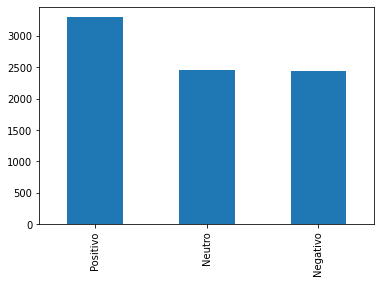

In [10]:
%matplotlib inline
df.Classificacao.value_counts().plot(kind='bar')

In [11]:
df.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

## Pre-Processamento dos Dados

* Remove linhas duplicadas na base de dados
    - Problema na coleta dos dados.
* Remove Stopwords
* Stemming ou Lemmatization
* Remove caracteres indesejados como links etc.

In [12]:
df.drop_duplicates(['Text'], inplace=True)

In [13]:
df.Text.count()

5765

## **Separando tweets e suas Classes**

In [14]:
tweets = df['Text']
classes = df['Classificacao']

**Instala bibliotecas e baixa a base de dados**

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Funções de Pre-processamento de dados**

In [20]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [19]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [21]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [22]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))

**Entenda como funciona cada função**

In [23]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'Eu gosto partido, votaria novamente nesse governante!'

In [24]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [25]:
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

In [30]:
Lemmatization('Os carros são bonitos')

'Os carros são bonito'

**Aplica as 3 funções de Pre-processamento nos dados**

In [31]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [32]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gost partido, vot nov ness govern assit vide aqu'

**Visualize os dados e veja como ficou após o pré-processamento**

In [33]:
tweets[:50]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estall

**Tokenização**
- Atente para o tipo de dados que você está trabalhando.

In [34]:
from nltk.tokenize import word_tokenize


In [35]:
frase = 'A live do @blogminerando é show! :) :-) ;) =D'

In [36]:

word_tokenize(frase)

['A',
 'live',
 'do',
 '@',
 'blogminerando',
 'é',
 'show',
 '!',
 ':',
 ')',
 ':',
 '-',
 ')',
 ';',
 ')',
 '=D']

In [37]:
from nltk.tokenize import TweetTokenizer

In [38]:
tweet_tokenizer = TweetTokenizer()

In [39]:
tweet_tokenizer.tokenize(frase)

['A',
 'live',
 'do',
 '@blogminerando',
 'é',
 'show',
 '!',
 ':)',
 ':-)',
 ';)',
 '=D']

## Criando o modelo

**Instancia o objeto que faz a vetorização dos dados de texto**

In [40]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

# vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features=1000)   <-- bases muito grandes

**Aplica o vetorizador nos dados de texto**

In [41]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

**Formato (Linhas, Colunas) da matriz**

In [42]:
freq_tweets.shape

(5765, 6138)

**Treino do modelo de Machine Learning**

In [43]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

**Matriz**

In [44]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Testando o modelo com algumas instâncias simples**

In [45]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

**Aplica a função de Pré-processamento nos dados**

In [46]:
testes = [Preprocessing(i) for i in testes]

In [47]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [48]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

govern início, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financeira!!!, Negativo
seguranç dess país deix desej, Neutro
govern min vez pt, Negativo


In [49]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.12, 0.88, 0.  ],
       [0.02, 0.95, 0.03],
       [1.  , 0.  , 0.  ],
       [0.01, 0.97, 0.01],
       [0.69, 0.3 , 0.01]])

## **Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [50]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

**Exemplos de utilização da tag de negações**

In [51]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [52]:
marque_negacao('Eu Não gosto do partido e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

## **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

* Pipeline que atribui tag de negacoes nas palavras

In [55]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [56]:
pipeline_simples.fit(tweets,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [58]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

* Gera o modelo de negações

In [57]:
pipeline_negacoes.fit(tweets,classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x7f4820b2a950>)),
                ('classifier', MultinomialNB())])

* Etapas do pipeline

In [59]:
pipeline_negacoes.steps

[('counts', CountVectorizer(tokenizer=<function <lambda> at 0x7f4820b2a950>)),
 ('classifier', MultinomialNB())]

Modelo com SVM

In [60]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [61]:
pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

## Validando os Modelos com Validação Cruzada

* Fazendo o cross validation do modelo

In [91]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

* Medindo a acurácia média do modelo

In [92]:
metrics.accuracy_score(classes,resultados)

0.8638334778837814

* Medidas de validação do modelo

In [101]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.77      0.90      0.83       951
      Neutro       0.80      0.85      0.82      1974
    Positivo       0.96      0.86      0.91      2840

    accuracy                           0.86      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.86      0.87      5765



* Matriz de confusão

In [102]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       852      91         8   951
Neutro         196    1675       103  1974
Positivo        64     323      2453  2840
All           1112    2089      2564  5765


In [103]:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [104]:
# naive bayes simples
Metricas(pipeline_simples,tweets,classes)

'Acurácia do modelo: 0.8638334778837814'

In [105]:
# naive bayes com tag de negacoes
Metricas(pipeline_negacoes,tweets,classes)

'Acurácia do modelo: 0.6992194275802255'

In [106]:
# svm linear simples
Metricas(pipeline_svm_simples,tweets,classes)

'Acurácia do modelo: 0.8799653078924544'

In [107]:
# svm linear com tag de negacoes
Metricas(pipeline_svm_negacoes,tweets,classes)

'Acurácia do modelo: 0.7330442324371206'

## **Modelo com a Tag de Negações**

In [108]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

* Medindo a acurácia média do modelo

In [109]:
metrics.accuracy_score(classes,resultados)

0.6992194275802255

In [110]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.65      0.53      0.58       951
      Neutro       0.69      0.59      0.63      1974
    Positivo       0.72      0.83      0.77      2840

    accuracy                           0.70      5765
   macro avg       0.68      0.65      0.66      5765
weighted avg       0.70      0.70      0.69      5765



* Matriz de confusão

In [111]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       503     169       279   951
Neutro         162    1165       647  1974
Positivo       114     363      2363  2840
All            779    1697      3289  5765


## **Avaliando modelo com Bigrams**

Eu gosto do Brasil -------------> **'eu gosto', 'gosto do' , 'do brasil'**

In [112]:
# Bigrams
vectorizer = CountVectorizer(ngram_range=(2,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [113]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [114]:
metrics.accuracy_score(classes,resultados)

0.8225498699045967

In [115]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.55      0.95      0.69       951
      Neutro       0.91      0.75      0.82      1974
    Positivo       0.95      0.83      0.88      2840

    accuracy                           0.82      5765
   macro avg       0.80      0.84      0.80      5765
weighted avg       0.87      0.82      0.83      5765



## **Considerações Finais**

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.

**www.minerandodados.com.br** - *A maior comunidade de Data Science do Brasil*